# Завдання

- Отримати навички роботи з інтелектуальними агентами.
- Розробити раціонального агента-автомобіль, що рухається по дорозі з попередньої лабораторної роботи.

# Опис алгоритму

1. Алгоритм починається з того, що встановлює початкову точку за активну та отримує усі ребра, пов'язані з нею.
2. Далі, перебираючи ці ребра, обраховується відстань від кінця ребра до кінцевої точки за координатами. Це і є **показник ефективності**.
3. Сортуючи ці відстані, агент переїжджає до точки з найменшою відстаню до кінцевої.
4. Можливо таке, що агент опинеться у тупику. Тоді він повертається на вершину, у якої було більше одного ребра. Оскільки агент має **попередні знання про середовище**, то це реально зробити. Також він знає, де вже проїжджав, тому не обере той самий шлях.

# Виконання

In [618]:
from typing import List
from random import choice
from copy import deepcopy
from math import sqrt

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [619]:
class Graph:
    def __init__(self, n: int = 5):
        self.double_n = n * n
        self.n = n
        self.edgesList: List[list] = [[] for _ in range(self.double_n)]
        self.edges_n = 0
        self._create_edges()
        self.__make_graph()
        self.active_node = 0
        self.history = []
        self.good_nodes = []

    def _create_edges(self): 
        for start in range(self.double_n):
            for end in range(self.double_n):
                if abs(end - start) == self.n:
                    self.edgesList[start].append(end)
                    self.edges_n += 1
                if abs(end - start) == 1:
                    if (start % self.n == 0 and (end + 1) % self.n == 0) or (end % self.n == 0 and (start + 1) % self.n == 0):
                        continue
                    self.edgesList[start].append(end)
                    self.edges_n += 1

    def delete_edges(self, delete_n: int):
        if delete_n > self.edges_n / 2 + 1 - self.double_n:
            raise Exception(f'Delete number must be less or equal than {int(self.edges_n / 2 + 1 - self.double_n)}')
        for _ in range(delete_n):
            edges = []
            while True:
                temp_list = deepcopy(self.edgesList)
                edgesList_copy = deepcopy(self.edgesList)
                point = choice(range(len(temp_list)))
                connected_point = choice(temp_list[point])
                if [point, connected_point] in edges:
                  continue
                edges.append([point, connected_point])
                temp_list[point].remove(connected_point)
                temp_list[connected_point].remove(point)
                self.edgesList = temp_list
                if self.isStronglyConnected():
                    print(point, connected_point)
                    break
                self.edgesList = edgesList_copy
        self.edges_n -= delete_n * 2

    
    def _DFS(self, v, visited):
        visited[v] = True
        for u in self.edgesList[v]:
            if not visited[u]:
                self._DFS(u, visited)

    def isStronglyConnected(self):
        for i in range(self.double_n):
            visited = [False] * self.double_n
            self._DFS(i, visited)
            for b in visited:
                if not b:
                    return False
        return True

    def __make_graph(self):
      self.G=nx.Graph()
      self.positions = {}
      counter = 0
      for i in range(n-1, -1, -1):
        for j in range(n):
          self.G.add_node(counter)
          self.positions[counter] = (j, i)
          counter += 1
      for point, connections in enumerate(self.edgesList):
        for connection in connections:
          self.G.add_edge(point, connection)
    
    def draw(self):
        self.__make_graph()
        colors = np.array(['orange'] * self.double_n)
        colors[self.history] = 'red'
        nx.draw(self.G, pos=self.positions, node_color=colors, with_labels=True, font_weight='bold', font_color='white')
        plt.show()

    def walking(self, end: int, start: int = None):
        if start is not None:
            self.active_node = start
        if not self.history:
            self.history.append(self.active_node)
        x1, y1 = self.positions[self.active_node]
        x2, y2 = self.positions[end]
        d = sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
        if d == 0.0:
            self.draw()
            print('History: ', self.history)
            print('You have ended the walk')
            self.active_node = 0
            self.history = []
            self.good_nodes = []
            return
        variants = {}
        edges = list(graph.G.edges(self.active_node))
        if len(edges) >= 2:
            if any(edge[1] not in self.history for edge in edges):
                self.good_nodes.append(self.active_node)
        for edge in edges:
            edge_on_end = edge[1]
            if not edge_on_end in self.history:
                x1, y1 = self.positions[edge_on_end]
                d = sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                variants[edge[1]] = d
        variants = dict(sorted(variants.items(), key=lambda item: item[1]))
        if not variants:
            next_pos = self.good_nodes.pop(0)
        else:
            next_pos = list(variants.keys())[0]
        self.history.append(next_pos)
        return self.walking(end, next_pos)


## Ініціалізація графу

In [620]:
n = 4

In [621]:
graph = Graph(n)

## Відображення графу

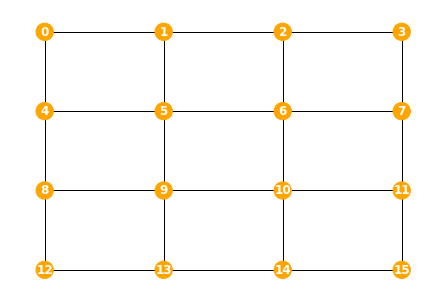

In [622]:
graph.draw()

## Видалення ребер

In [623]:
graph.delete_edges(9)

15 14
8 9
9 5
1 5
13 14
10 6
5 4
9 10
3 2


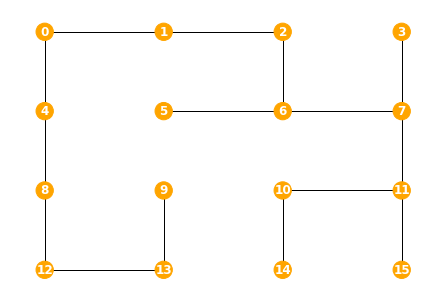

In [624]:
graph.draw() 

## Тестування проходження шляху

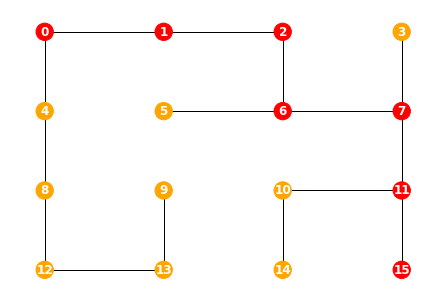

History:  [0, 1, 2, 6, 7, 11, 15]
You have ended the walk


In [625]:
graph.walking(end=15)

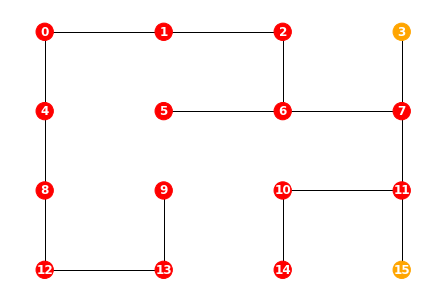

History:  [0, 4, 8, 12, 13, 9, 0, 1, 2, 6, 5, 4, 8, 12, 13, 0, 1, 2, 6, 7, 11, 10, 14]
You have ended the walk


In [626]:
graph.walking(14)

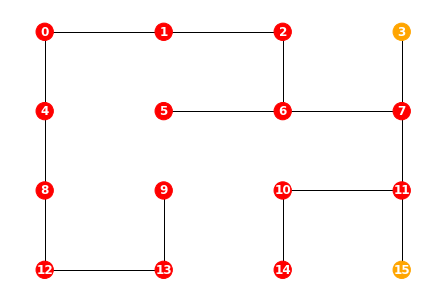

History:  [9, 13, 12, 8, 4, 0, 1, 2, 6, 5, 13, 12, 8, 4, 0, 1, 2, 6, 7, 11, 10, 14]
You have ended the walk


In [627]:
graph.walking(14, 9)

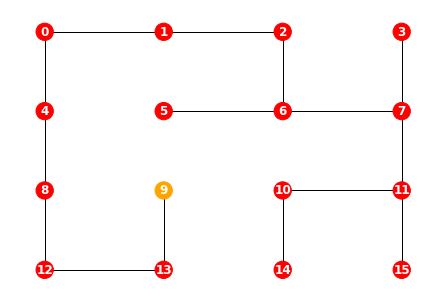

History:  [15, 11, 10, 14, 11, 7, 6, 5, 10, 11, 7, 3, 6, 2, 1, 0, 4, 8, 12, 13]
You have ended the walk


In [628]:
graph.walking(13, 15)

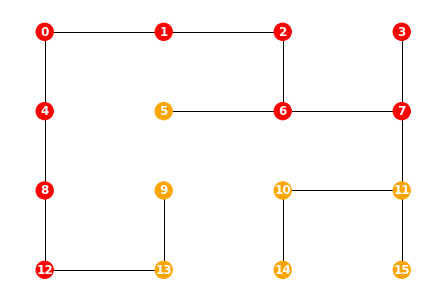

History:  [12, 8, 4, 0, 1, 2, 6, 7, 3]
You have ended the walk


In [629]:
graph.walking(3, 12)

# Висновок

Я на практиці ознайомився із терміном раціональний агент та як встановлювати показник ефективності. Мій алгоритм не є ідеальним, але, особисто для мене, він наглядно дав зрозуміти завдання та мету даної роботи.